In [2]:
#Classify images of flowers based on their features such as 
#the petal length, petal width, sepal length, and sepal width? 
#Use the Iris Flowers dataset, which contains information on 
#150 iris flowers belonging to three different species, and 
#apply SVM or random forest to classify the flowers.

In [3]:
#Import Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
#Load CSV file into DataFrame
df=pd.read_csv('Flower.csv')

In [5]:
#Explore Data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Analyze Data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Analyze Data
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
#Analyze Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


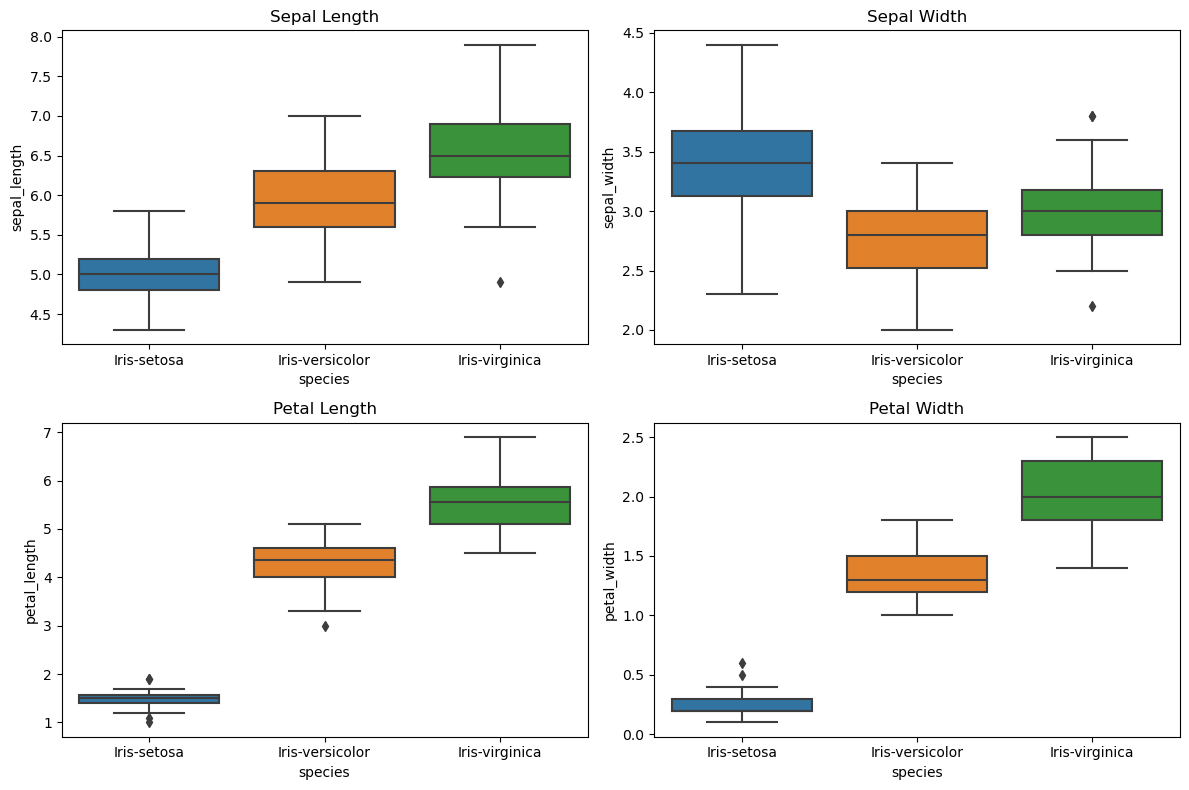

In [9]:
#Visualize Data
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))

sns.boxplot(x=df['species'],y=df['sepal_length'],ax=axes[0,0])
axes[0,0].set_title('Sepal Length')

sns.boxplot(x=df['species'],y=df['sepal_width'],ax=axes[0,1])
axes[0,1].set_title('Sepal Width')

sns.boxplot(x=df['species'],y=df['petal_length'],ax=axes[1,0])
axes[1,0].set_title('Petal Length')

sns.boxplot(x=df['species'],y=df['petal_width'],ax=axes[1,1])
axes[1,1].set_title('Petal Width')

plt.tight_layout()

plt.show()

In [10]:
#Train/Test Separation
y=df['species'] 
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=64)

In [11]:
#Random Forest Creation
model_rf = RandomForestClassifier(random_state=64)

#Random Forest Train
model_rf.fit(X_train, y_train)

#Importance of the variables in the model
pd.DataFrame(model_rf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

,importance
petal_width,0.473514
petal_length,0.439481
sepal_length,0.068841
sepal_width,0.018165


In [12]:
#Random Forest Test Accuracy
print(f'Accuracy : {accuracy_score(y_test,model_rf.predict(X_test))*100} %')

Accuracy : 94.73684210526315 %


In [17]:
#Random Forest Confusion Matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,model_rf.predict(X_test)),
                              index=['iris-setosa','iris-versicolor','iris-virginica'],
                              columns=['iris-setosa_predict','iris-versicolor_predict','iris-virginica_predict'])
confusion_matrix

,iris-setosa_predict,iris-versicolor_predict,iris-virginica_predict
iris-setosa,12,0,0
iris-versicolor,0,13,2
iris-virginica,0,0,11


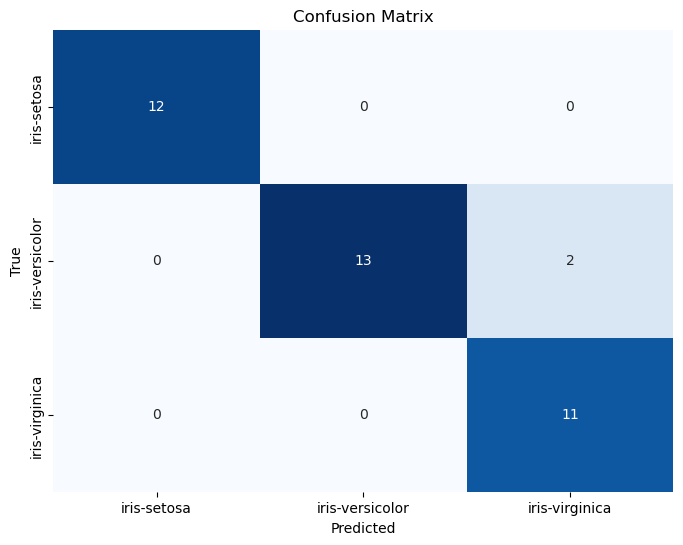

In [18]:
#Random Forest Confusion Matrix Graph
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['iris-setosa', 'iris-versicolor', 'iris-virginica'],
            yticklabels=['iris-setosa', 'iris-versicolor', 'iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()